<a href="https://colab.research.google.com/github/Jubin5/Census/blob/main/Census_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Title of ML project: INCOME LEVEL CASSIFICATION PREDICTIONS**

**Name:** JUBIN K BABU

**Organization:** Entri Elevate

**Date:** [Evaluation Date]


**Overview of Problem Statement:**The ML project aims to predict whether an individual’s income is above or below $50K using the Census Income Dataset from UCI. The dataset includes demographic and work-related features like age, education, occupation, work hours, and capital gain/loss. The workflow involves data preprocessing, exploratory data analysis (EDA), model training using classification algorithms (Logistic Regression, Decision Trees, Random Forest, etc.), and performance evaluation. The best-performing model will be optimized and deployed for practical use. This project provides insights into income disparity factors and can be useful in HR analytics, financial planning, and policy-making


**Objective:** Develop a machine learning model to predict whether an individual earns more than $50K per year based on demographic and employment-related attributes from the UCI Census Income dataset. This model can be useful for socioeconomic analysis, government policy planning, and targeted financial services.

**Data Description:**
Source:[UCI Census Income dataset (also known as "Adult" dataset)]

Features: [age,workclass,fnlwgt,education,education-num,marital-status,	occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,	native-country,income]





**4. Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Define column names based on dataset description
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Load the .data and .test files into DataFrames
df_train = pd.read_csv("/content/adult.data", names=columns, skipinitialspace=True)
df_test = pd.read_csv("/content/adult.test", names=columns, skipinitialspace=True, skiprows=1)

# Display first few rows
print(df_train.head())
print(df_test.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

**CONVERTING TO DATAFRAME**

In [ ]:
# prompt: code to converting this to a dataframe

import pandas as pd
# Concatenate the training and testing datasets
df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the combined DataFrame
df = df.reset_index(drop=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**5.DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.duplicated().sum()

29

In [ ]:
df.drop_duplicates(inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
df["sex"].value_counts()

,count
sex,
Male,32631
Female,16182


Here male count is greater than female


In [ ]:
df["race"].value_counts()

,count
race,
White,41736
Black,4683
Asian-Pac-Islander,1518
Amer-Indian-Eskimo,470
Other,406


In [ ]:
df["native-country"].value_counts()

,count
native-country,
United-States,43810
Mexico,947
?,856
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [ ]:
df['native-country'] = df['native-country'].replace("?", np.nan)


In [ ]:
df["native-country"].value_counts()

,count
native-country,
United-States,43810
Mexico,947
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [ ]:
print(df['native-country'].isnull().sum())


856


In [ ]:
most_frequent_country = df['native-country'].mode()[0]
df['native-country'] = df['native-country'].fillna(most_frequent_country)


In [ ]:
print(df['native-country'].isnull().sum())


0


In the above code we replaced the "?" in the native country column to nan value and then replaced with its mode value and then again we checked for the null values


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.select_dtypes(include="number").skew()

,0
age,0.556775
fnlwgt,1.439534
education-num,-0.315007
capital-gain,11.891093
capital-loss,4.568263
hours-per-week,0.239643


Here we can see that the most outliers are  present in the columns "capital-loss" and capital-gain",we are mainly focussing to build an ML model of classification so in that case we not needed to remove this outlier otherwise it will give negative result with low accuracy


**6. EXPLORATORY DATA ANALYSIS**

<ipython-input-16-3126ab215331>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


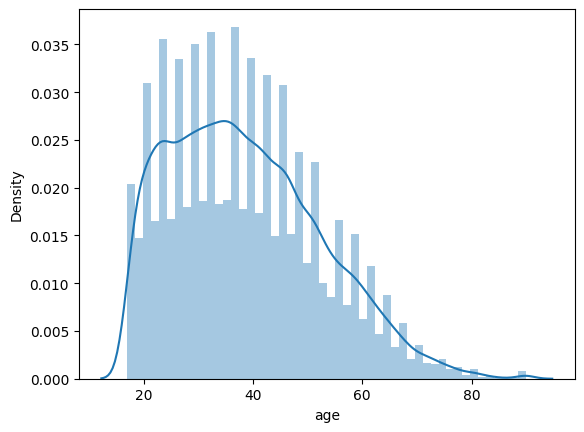

In [ ]:
sns.distplot(df['age'])
plt.show()


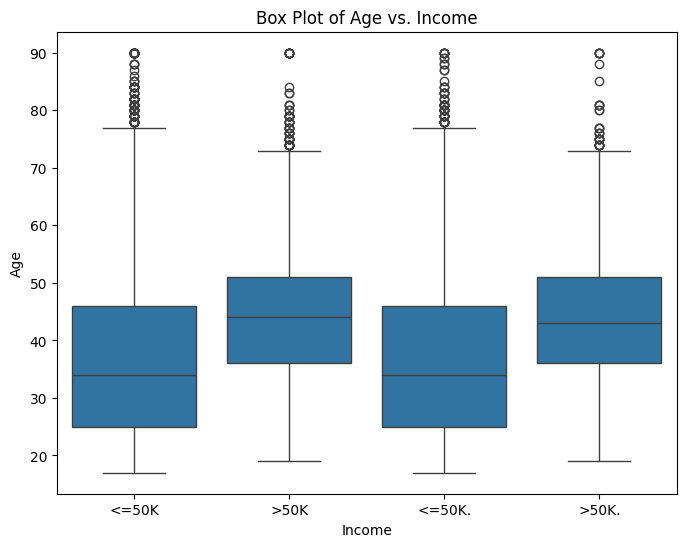

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Box Plot of Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


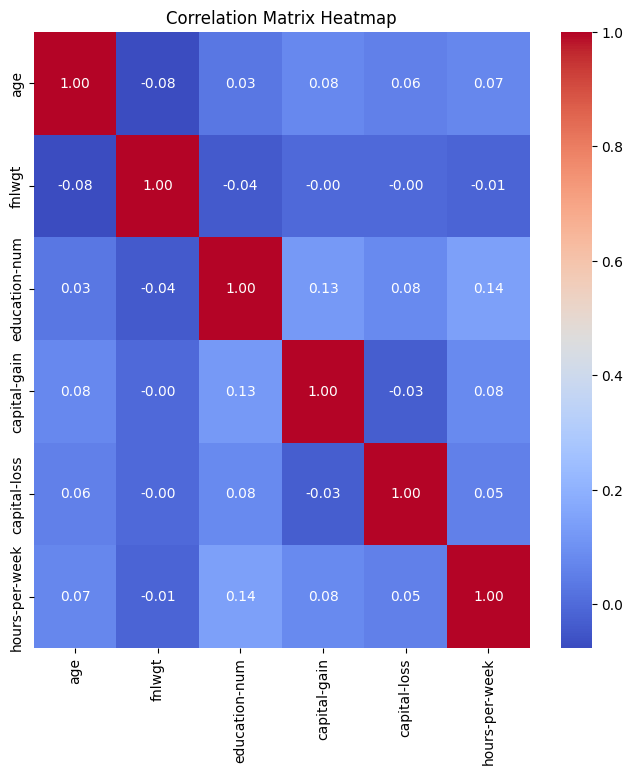

In [ ]:
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


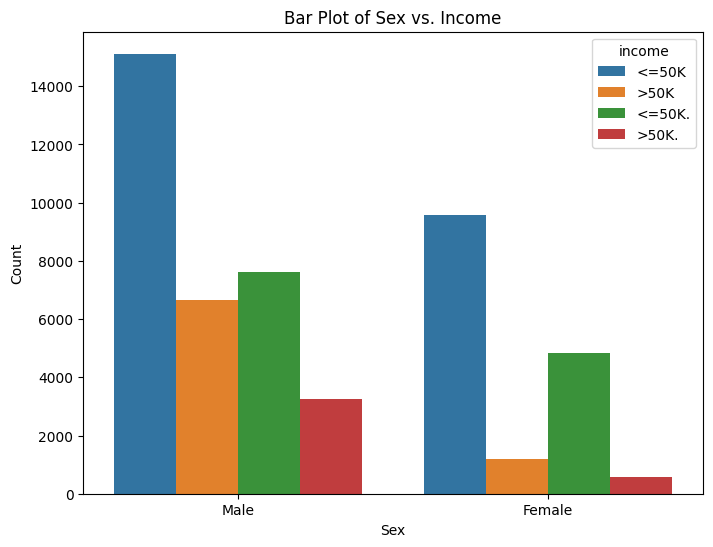

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, hue='income')
plt.title('Bar Plot of Sex vs. Income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


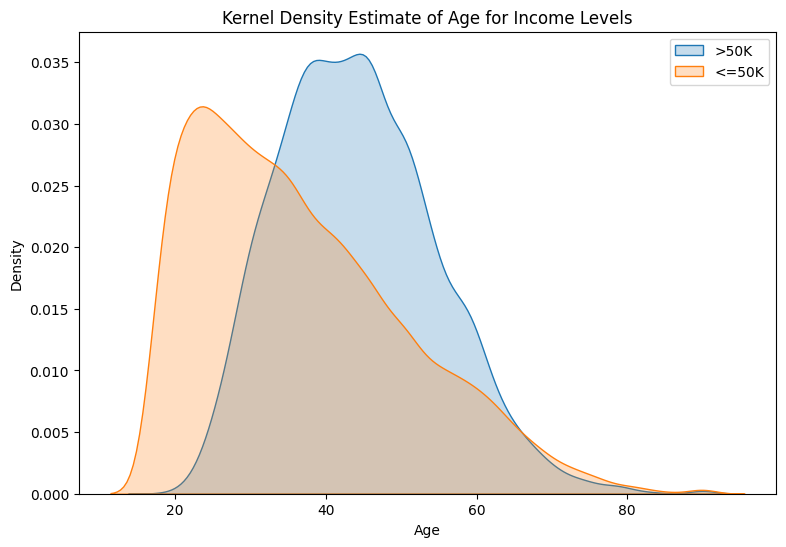

In [ ]:

plt.figure(figsize=(9, 6))
sns.kdeplot(df[df['income'] == '>50K']['age'], label='>50K', fill=True)
sns.kdeplot(df[df['income'] == '<=50K']['age'], label='<=50K', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Age for Income Levels')
plt.legend()
plt.show()


**8. FEATURE SELECTION**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('income', axis=1)
y = df['income']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Initialize SelectKBest with ANOVA F-value and choose top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print(selected_features)

# Create a new DataFrame with only the selected features
X_selected = pd.DataFrame(X_new, columns=selected_features)

# Now X_selected contains your top 10 features


Index(['age', 'education', 'education-num', 'marital-status', 'occupation',
       'relationship', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')



**9. Split Data into Training and Testing Sets**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)